# Verificar as regiões de maior modificação nas regiões das proteínas NS1, NS3 e NS5 de Zika vírus.

# Prepare IDE

In [9]:
#!pip install tqdm
#!pip install biopython
#!pip install pandas
#!pip install seaborn
#!pip install rpy2
#!pip install numpy 

# Imports

In [1]:
import pandas as pd

# Custom libraries 

In [2]:
import WorkFunctions as wFunc
import WorkFlow as wFlow
import Graphs as gr

# Read files

In [3]:
protein = "read/Protein - C_NS5"
fastaProSequences = wFunc.fileRead(protein, ".fa")

# Make DataFrames
 - Fasta DataFrames

In [4]:
%%time
columns=["ID", "Host", "Region", "Date", "FullSeq"]
#Make DataFrames
fastaProDF = wFunc.makeDF(columns, fastaProSequences)

Wall time: 882 ms


In [5]:
fastaProDF.head(2)

,ID,Host,Region,Date,FullSeq
0,AQU12485,Homo sapiens,Brazil,2016-01-08 00:00:00,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...
1,AMS00611,Homo sapiens,Italy,2016-03-06 00:00:00,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...


# Read PDBs

In [6]:
%%time
#dataList = ['5GS6', '5IY3', '5K6K', '5JMT', "5TMH"]
def choceOne(val):
    if val == -1:
        return ['5GS6', '5IY3', '5K6K', '5JMT', "5TMH"], []
    else:
        dataList = ['5GS6', '5IY3', '5K6K', '5JMT', "5TMH"]
        return [dataList.pop(val)], dataList
#0, 
saveList, delList = choceOne(-1)

makeTheMagic = False
path = "read/ResultCover/allSequencesCover.csv"
path2 = "read/ResultCover/allSequencesAmino.csv"
if makeTheMagic:
    nsFiles = wFunc.readPDBs()
    print("I'm going to an adventure!")
    obj = wFlow.work()
    """
    1 - PDBs
    2 - Sequences
    3 - showAlign=False
    4 - saveAlign=False
    """
    cover, aminoDegrees = obj.prepareWork(nsFiles, fastaProDF, delList)
    aminoDegrees.to_csv(path2, sep="\t", index=False)
    cover.to_csv(path, sep="\t", index=False)
    
    wFunc.countAndSavePoli(saveList, aminoDegrees)
    wFunc.countAndSavePoli(saveList, aminoDegrees, False)
    
    #obj.makeFasta(cover, dataList)
    
print("Ok, just reading!")
cover = pd.read_csv(path, sep="\t") 
aminoDegrees = pd.read_csv(path2, sep="\t")
poliListAmino = wFunc.readSavedPoli(saveList)
poliListDegree = wFunc.readSavedPoli(saveList, False)

Ok, just reading!
Reading PDB: 5GS6
Reading PDB: 5IY3
Reading PDB: 5K6K
Reading PDB: 5JMT
Reading PDB: 5TMH
Reading PDB: 5GS6
Reading PDB: 5IY3
Reading PDB: 5K6K
Reading PDB: 5JMT
Reading PDB: 5TMH
Wall time: 442 ms


In [7]:
cover.head()

,Protein,Sample_ID,Seq,Cover
0,5JMT,AQU12485,PVECFEPSMLKKKQLTVLDLHPGAGKTRRVLPEIVREAIKTRLRTV...,90.519187
1,5TMH,AQU12485,TLGEKWKARLNQMSALEFYSYKKSGITEVCREEARRALKDGVATGG...,86.990950
2,5GS6,AQU12485,VGCSVDFSKKETRCGTGVFVYNDVEAWRDRYKYHPDSPRRLAAAVK...,91.168091
3,5IY3,AQU12485,LKVREDYSLECDPAVIGTAVKGKEAVHSDLGYWIESEKNDTWRLKR...,88.043478
4,5K6K,AQU12485,DVGCSVDFSKKETRCGTGVFVYNDVEAWRDRYKYHPDSPRRLAAAV...,90.909091


In [8]:
aminoDegrees.head()

,ID,Protein,Seq,Len
0,AQU12485,5JMT,"P,1|V,5|E,2|C,-2|F,4|E,1|P,1|S,1|M,4|L,7|K,3|K...",1825
1,AQU12485,5TMH,"T,3|L,6|G,3|E,2|K,5|W,12|K,4|A,4|R,3|L,6|N,3|Q...",3640
2,AQU12485,5GS6,"V,2|G,2|C,3|S,2|V,2|D,4|F,4|S,-2|K,3|K,2|E,2|T...",1442
3,AQU12485,5IY3,"L,5|K,-2|V,2|R,4|E,2|D,1|Y,1|S,4|L,2|E,2|C,5|D...",757
4,AQU12485,5K6K,"D,3|V,4|G,1|C,3|S,2|V,2|D,7|F,2|S,1|K,3|K,4|E,...",1439


In [9]:
#temp = aminoDegrees[ aminoDegrees.Len > 1442].rename(columns={"ID": "Sample_ID"})
#pd.merge(temp, cover, on=["Sample_ID", "Protein"])

## Identidates em todas as amostras

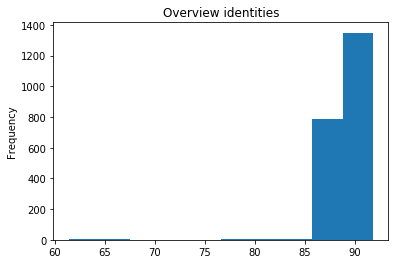

Wall time: 118 ms


In [10]:
%%time
gr.plotCoverRange(cover)

## Salvar Fasta

## Separar as amostras em seus respectivos DF para análise de grau

In [11]:
for ii in poliListDegree:
    print(ii.head(2))

   0POS  1POS  2POS  3POS  4POS  5POS  6POS  7POS  8POS  9POS   ...    434POS  \
0     2     2     3     2     2     4     4    -2     3     2   ...       NaN   
1     2     2     3     2     2     4     4    -2     3     2   ...       NaN   

   435POS  436POS  437POS  438POS  439POS  440POS  441POS  442POS  443POS  
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[2 rows x 444 columns]
   0POS  1POS  2POS  3POS  4POS  5POS  6POS  7POS  8POS  9POS   ...    874POS  \
0     5    -2     2     4     2     1     1     4     2     2   ...       NaN   
1     5    -2     2     4     2     1     1     4     2     2   ...       NaN   

   875POS  876POS  877POS  878POS  879POS  880POS  881POS  882POS  883POS  
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[2 rows x 884 columns]
   0POS 

## Plotting polimorphisms

Overview PDB 5GS6:


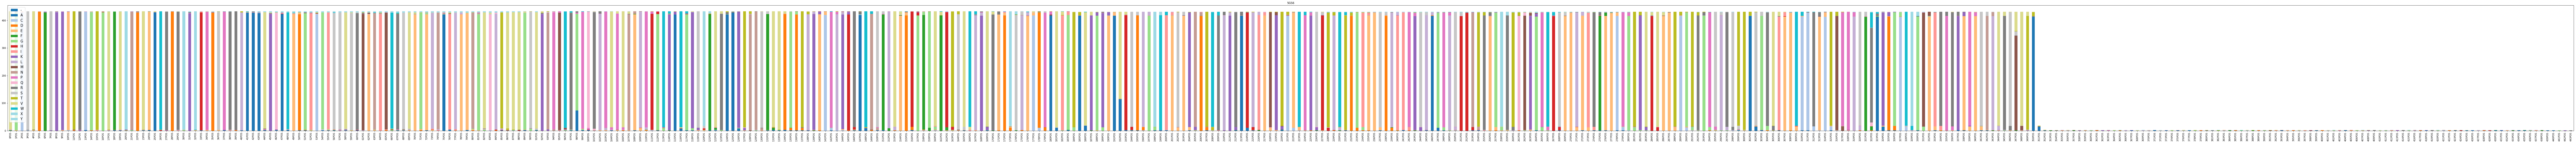

Polimorphism PDB 5GS6:


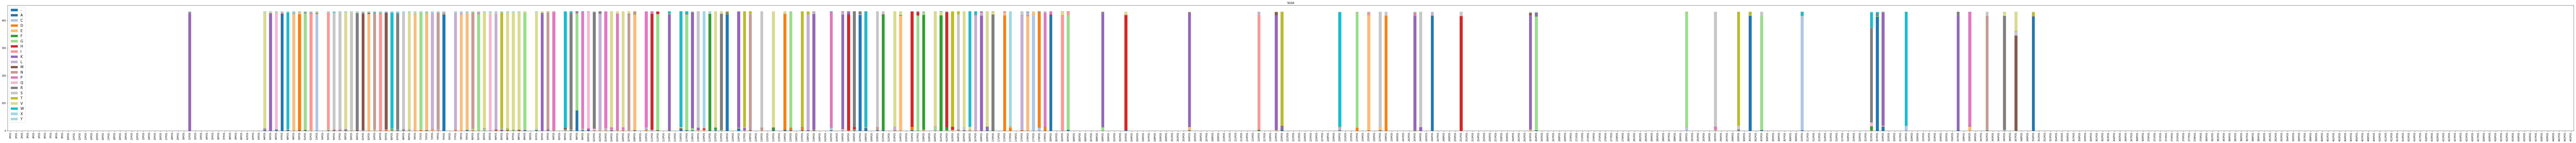

Overview PDB 5IY3:


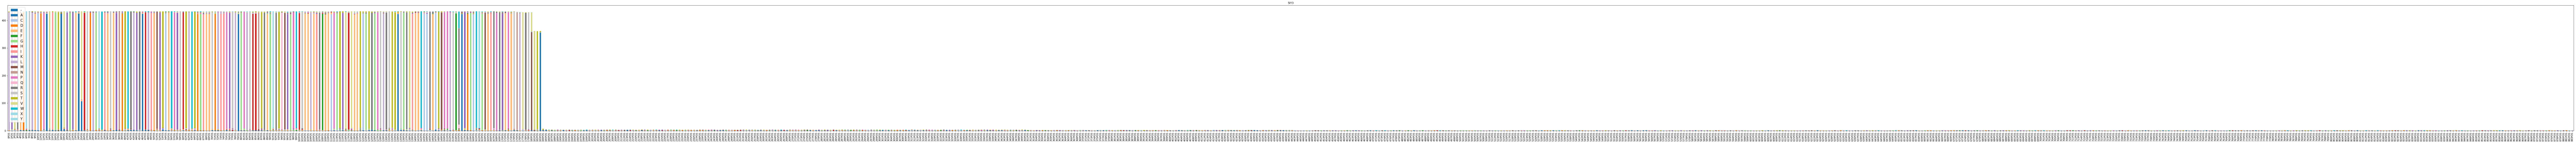

Polimorphism PDB 5IY3:


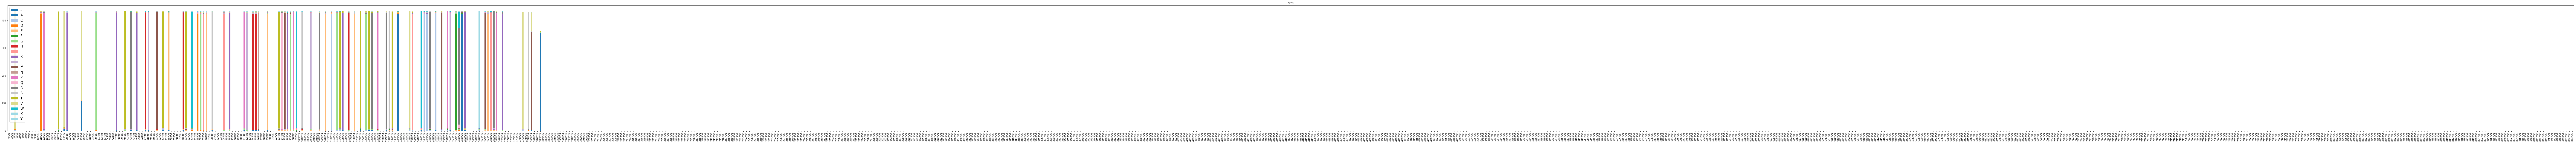

Overview PDB 5K6K:


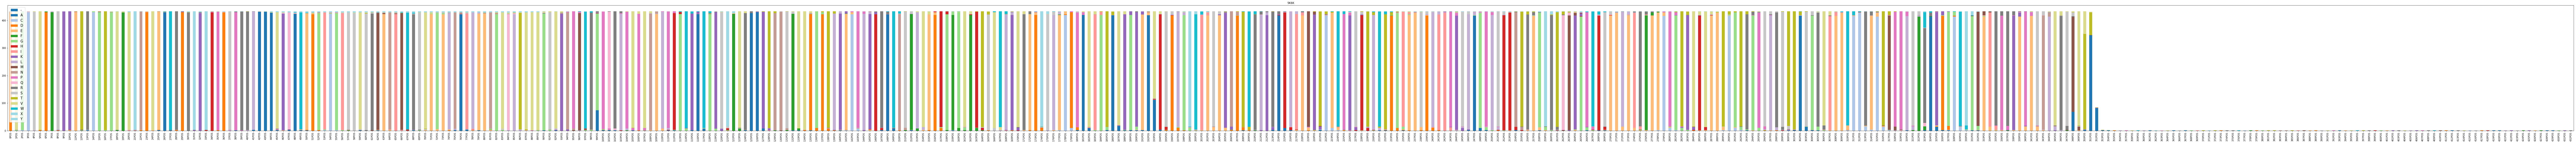

Polimorphism PDB 5K6K:


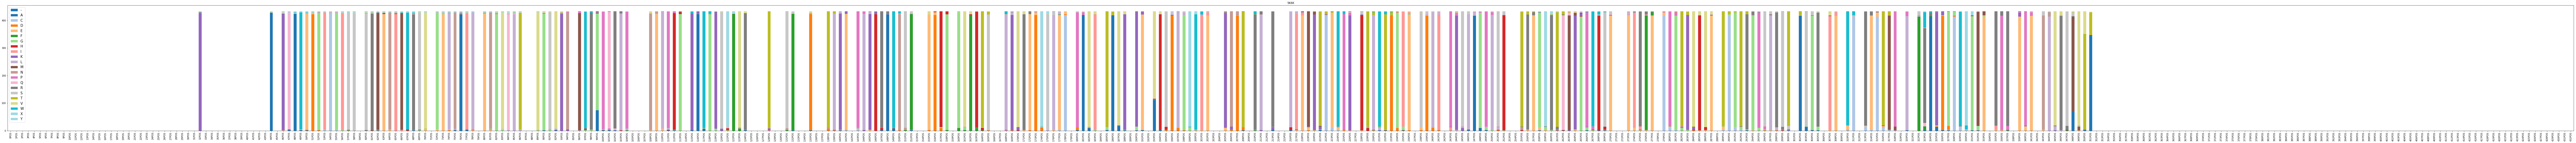

Overview PDB 5JMT:


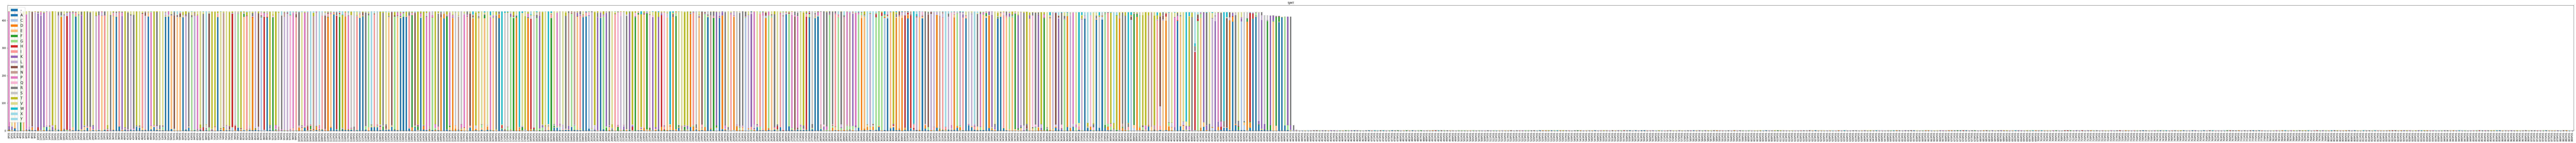

Polimorphism PDB 5JMT:


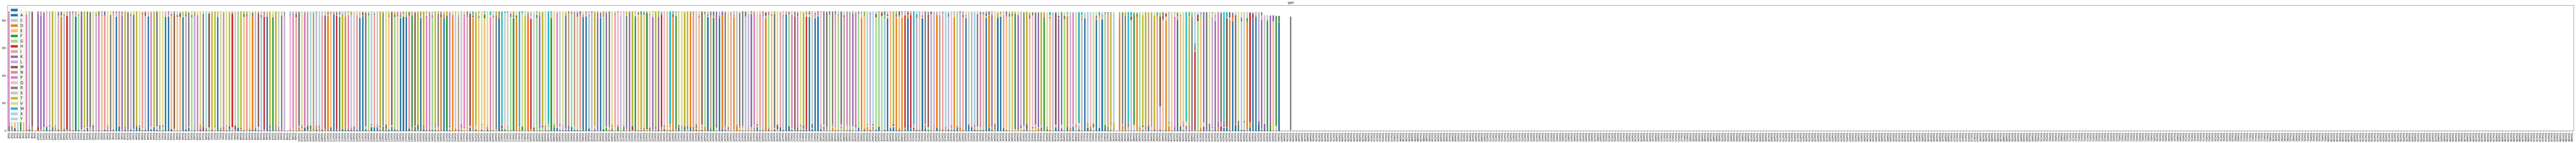

Overview PDB 5TMH:


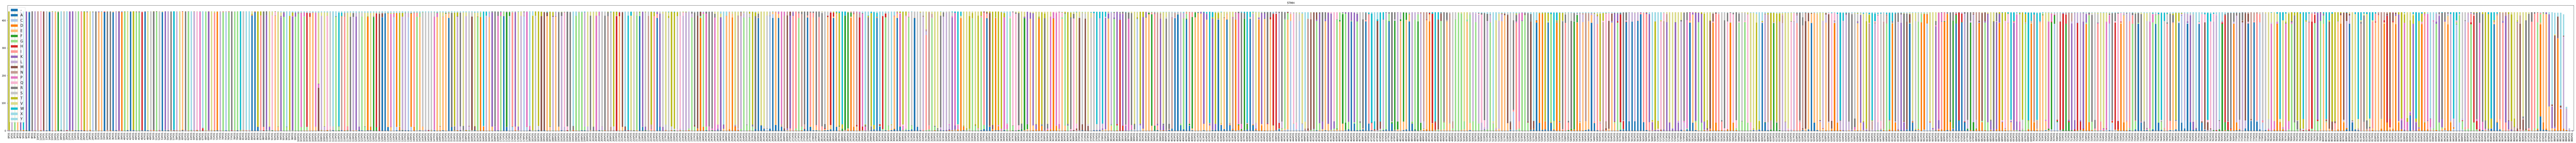

Polimorphism PDB 5TMH:


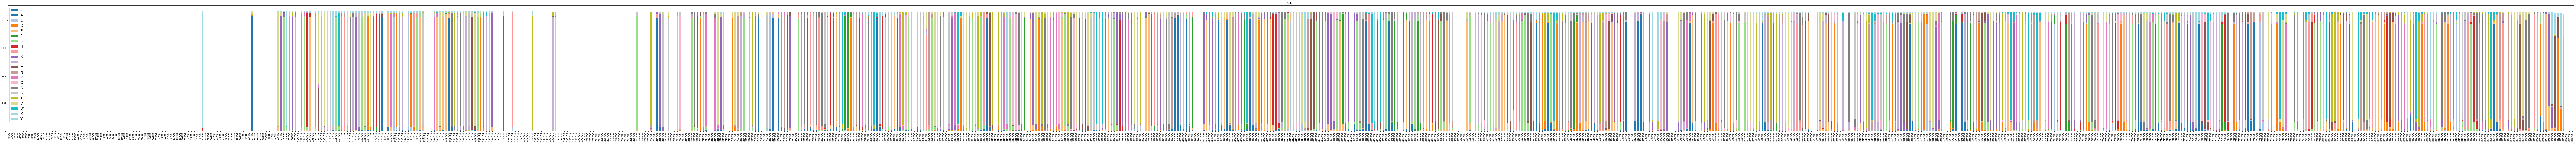

Wall time: 4min 58s


In [12]:
%%time
gr.plotPolimorph(saveList, poliListAmino, 4)

## Samples

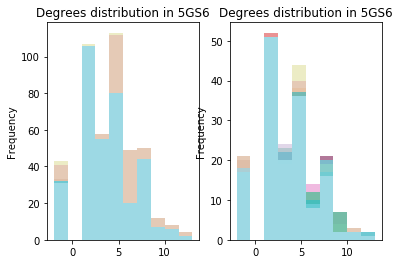

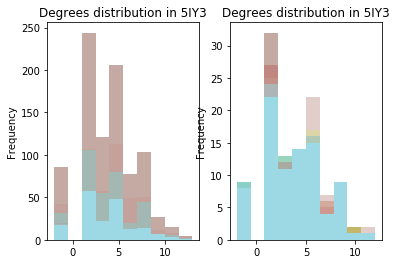

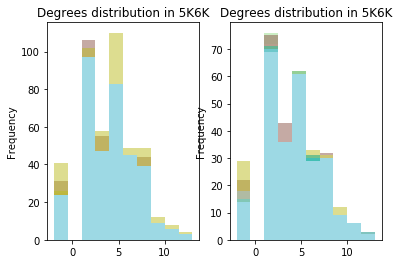

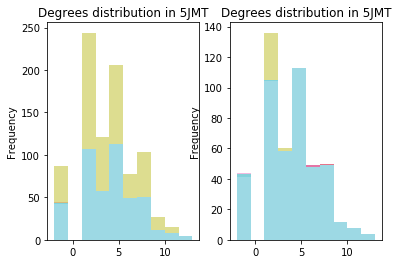

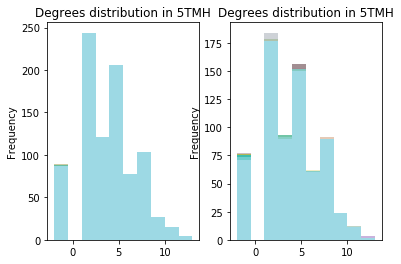

Wall time: 4min 21s


In [7]:
%%time
gr.plotDegrees(saveList, poliListDegree, poliListAmino)